<a href="https://colab.research.google.com/github/Lithikhaa/decision-tree/blob/main/decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000
mean,26.554173,4.850133,1.794792,0.881199,0.345034,0.105059,0.646721,0.084322
std,58.926277,23.657451,2.715440,0.323574,0.475409,0.306649,0.478018,0.277888
min,0.049270,0.000930,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.901588,0.305763,0.487838,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.036014,1.009609,0.993034,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.941668,3.274358,2.048319,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              8005 non-null   float64
 1   distance_from_last_transaction  8005 non-null   float64
 2   ratio_to_median_purchase_price  8005 non-null   float64
 3   repeat_retailer                 8005 non-null   int64  
 4   used_chip                       8005 non-null   int64  
 5   used_pin_number                 8005 non-null   int64  
 6   online_order                    8005 non-null   int64  
 7   fraud                           8005 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 500.4 KB


In [ ]:
df.shape

(8005, 8)

In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
8000,1.745642,0.941749,0.387604,0,1,0,1,0
8001,1.361937,10.466284,1.918309,0,1,1,1,0
8002,4.171677,0.264895,1.416734,1,1,0,1,0
8003,207.529715,0.020097,2.484329,1,0,0,1,1
8004,15.856885,0.464650,1.182904,1,0,1,0,0


<function matplotlib.pyplot.show(*args, **kw)>

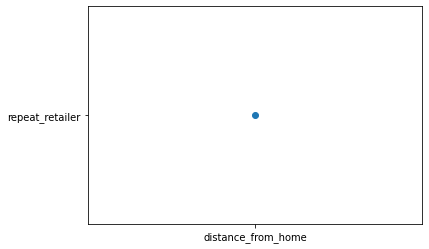

In [ ]:
x = "distance_from_home"
y = "repeat_retailer"
plt.scatter(x,y)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

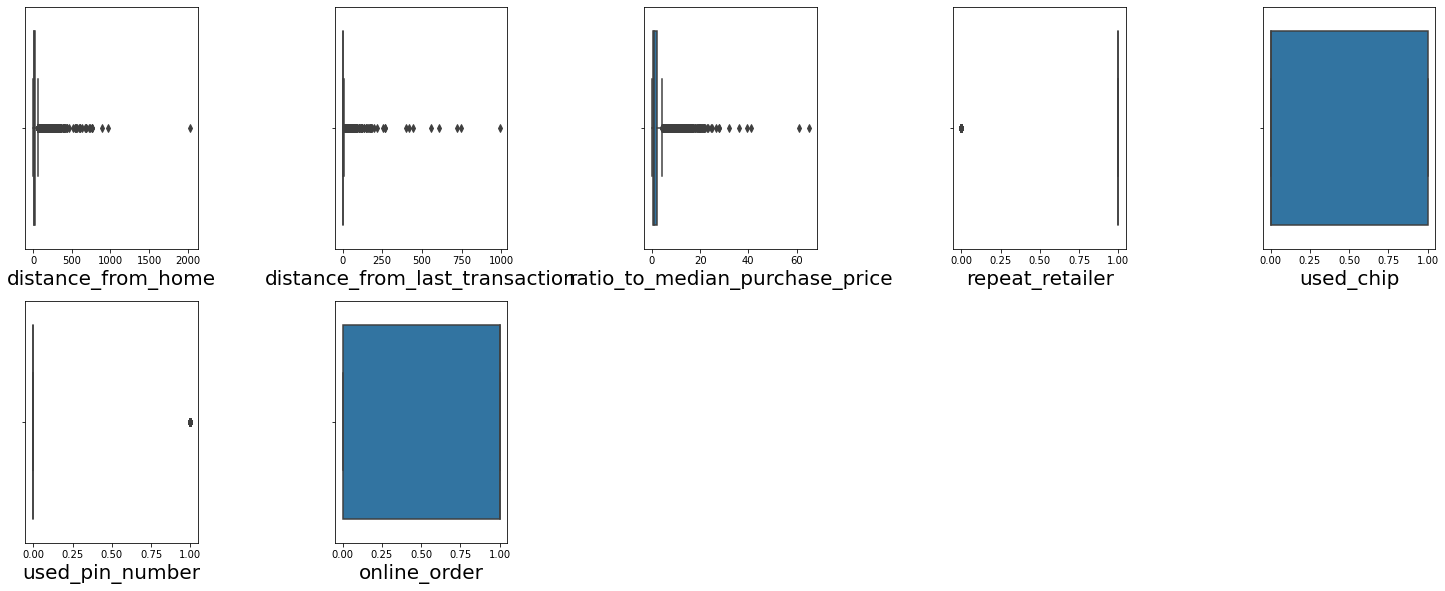

In [ ]:
plt.figure(figsize = (20,20))
plotnumber = 1
for col in df.columns:
  if plotnumber <=7:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize = 20)
  plotnumber +=1
plt.tight_layout()
plt.show()

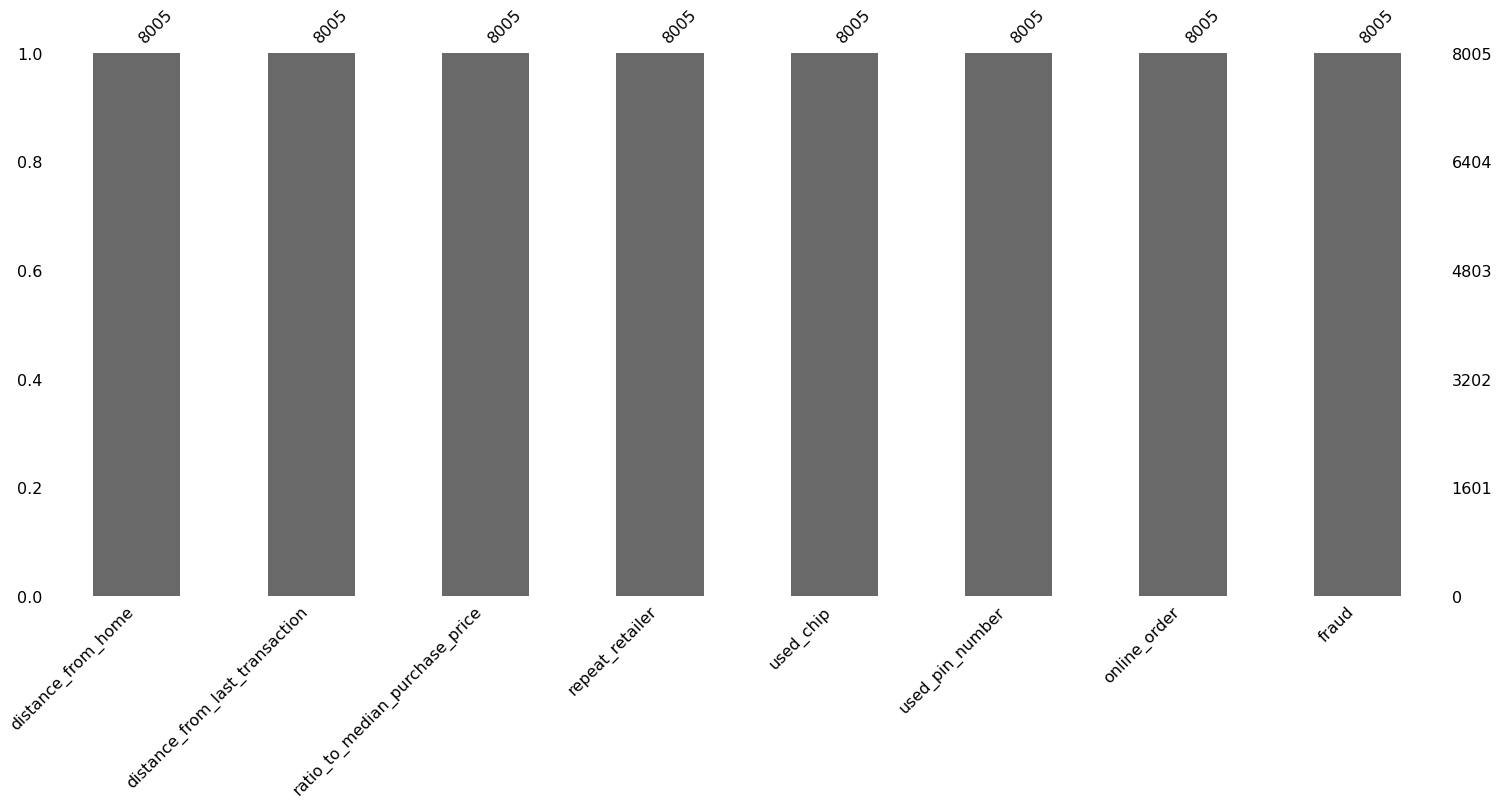

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
x = df.drop('fraud', axis =1)
y = df['fraud']


In [ ]:
x_train, x_test, y_train, y_test=train_test_split (x,y,test_size = 0.7, random_state=5)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion ="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5105,   20],
       [  19,  460]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9930406852248393

In [ ]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB

In [ ]:
clf1 = GaussianNB()
clf1.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_predi = clf.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test,y_predi)
cm

array([[5006,  119],
       [ 255,  224]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi)

0.9332619557458958